#import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#sex
#chest pain type (4 values)
#resting blood pressure
#serum cholestoral in mg/dl
#fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0,1,2)
#maximum heart rate achieved
#exercise induced angina
#oldpeak = ST depression induced by exercise relative to rest
#the slope of the peak exercise ST segment
#number of major vessels (0-3) colored by flourosopy
#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
#The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


#read the dataset

In [3]:
data=pd.read_csv("heart2.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#display first 5 rows of a data setage

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#Find the shape of the dataframe

In [5]:
data.shape

(1025, 14)

#Know the essential information of dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#Find the total number of null value in a given dataset

In [7]:
data.isnull().sum()
#in this dataset there are no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#find the duplicate values in a dataframe

In [8]:
data.duplicated().any()

True

#if duplicates present drop them

In [9]:
data=data.drop_duplicates()
data.shape

(302, 14)

#knowing the brief description of a dataset

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#studying the correlation between the various data in a dataframe by using a heatmap

<AxesSubplot: >

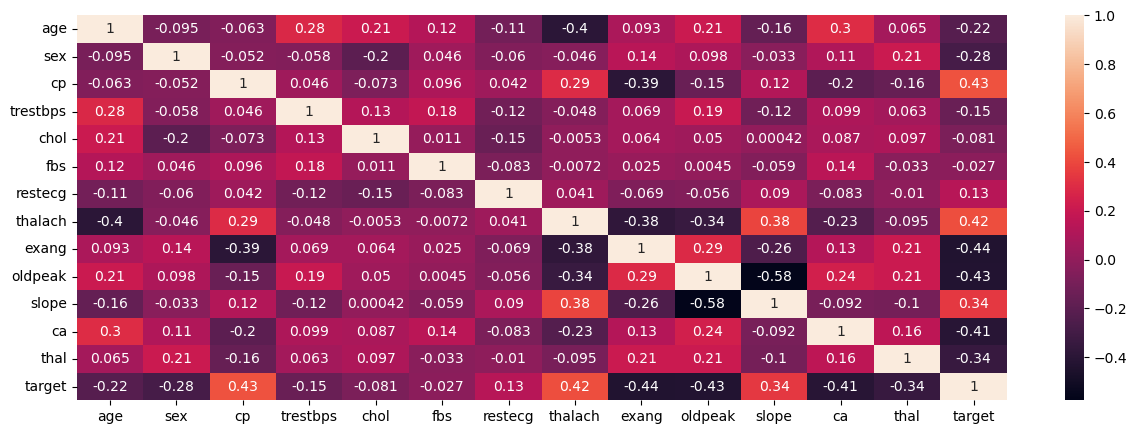

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

#finding the unique values in target column and visualising it

In [12]:
data["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

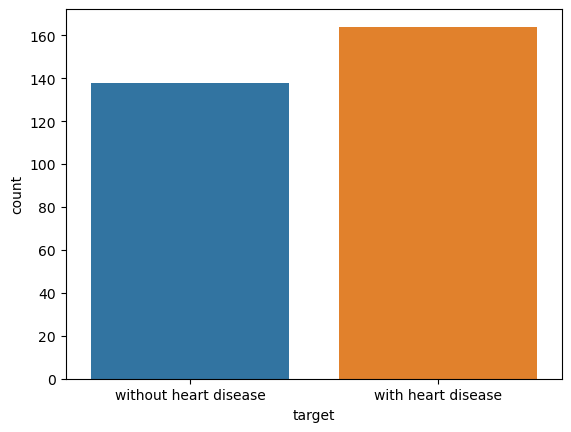

In [13]:
sns.countplot (data=data,x='target')
plt.xticks([0,1],['without heart disease','with heart disease'])
plt.show()

#finding the sex distribution i.e "male" and "female" and visualising it

In [14]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

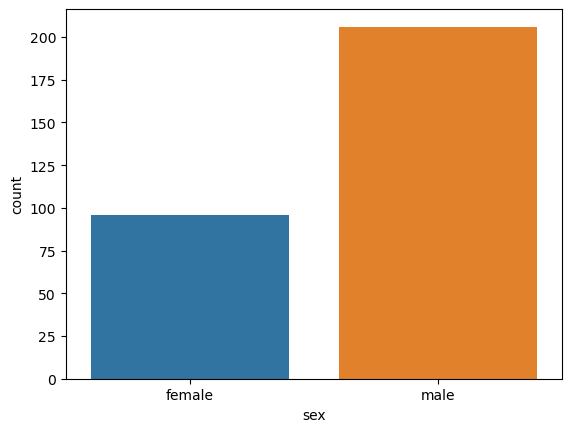

In [15]:
sns.countplot(data=data,x='sex')
plt.xticks([0,1],['female','male'])
plt.show()

#comparitive studies between thal and target to know the distribution of normal,fixed defect and reversable defect in the targeted patients

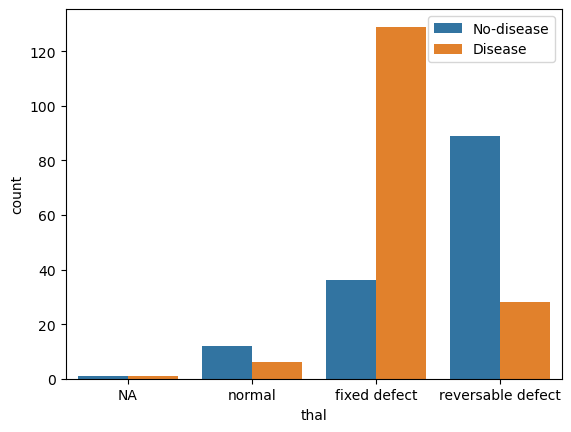

In [16]:
sns.countplot(data=data,x='thal',hue='target')
plt.xticks([0,1,2,3],['NA','normal','fixed defect','reversable defect'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

#ploting a displot to know age distribution across population

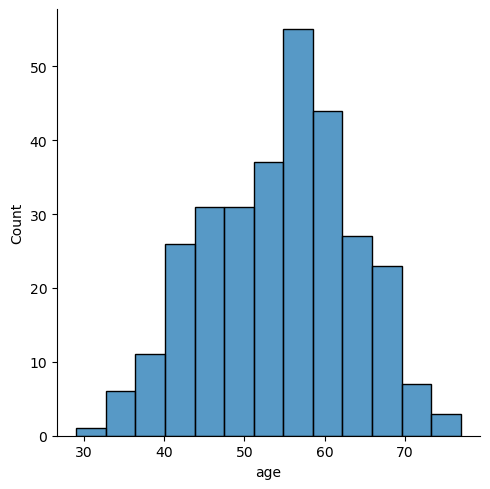

In [17]:
sns.displot(data=data,x='age')
plt.show()

In [74]:
def categorize_age(age):
    if age < 18 and age>0:
        return 'Young'
    elif age < 60 and age>18:
        return 'Adult'
    else:
        return 'Old'
data_copy = data.copy()
data_copy['Age_Category'] = data['age'].apply(categorize_age)
print(data_copy['Age_Category'].value_counts())

Adult    212
Old       90
Name: Age_Category, dtype: int64


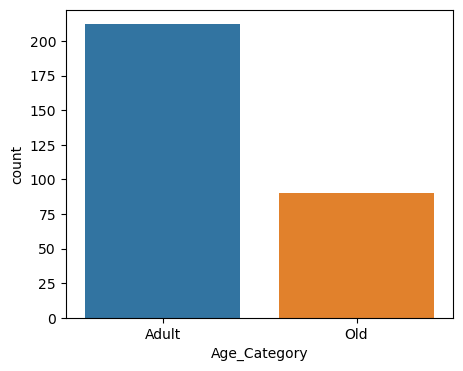

In [81]:
plt.figure(figsize=(5,4))
sns.countplot(x='Age_Category', data=data_copy)
plt.show()

#finding the number of male and female patient distribution across the target patients

sns.countplot(data=data,x='sex',hue='target')
plt.xticks([0,1],['female','male'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

#finding the number of male and female patient distribution across various age group

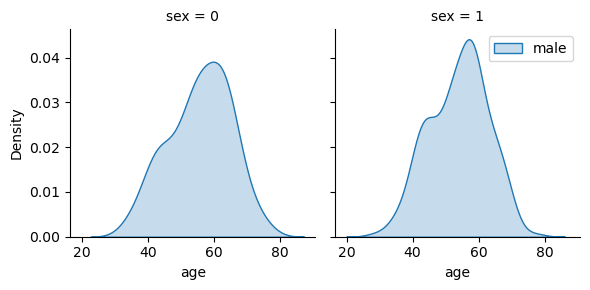

In [20]:
g=sns.FacetGrid(data,col='sex',aspect=1)
g.map(sns.kdeplot,'age',fill=True)
plt.legend(labels=['male','female'])
plt.show()

#ploting the unique values in chestpain column accordingly

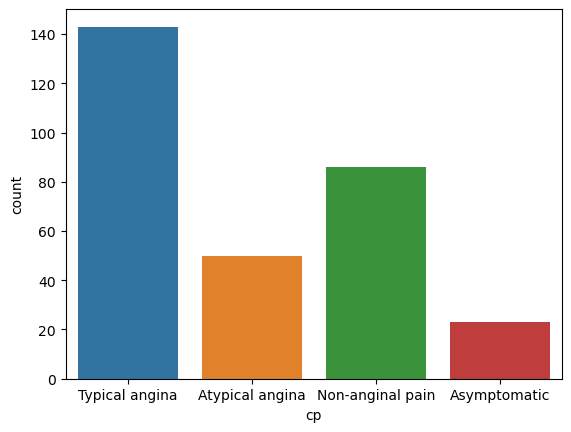

In [21]:
sns.countplot(data=data,x=('cp'))
plt.xticks([0,1,2,3],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'])
plt.show()

#ploting the comparitive countplot of chestpain in targeted population of patients

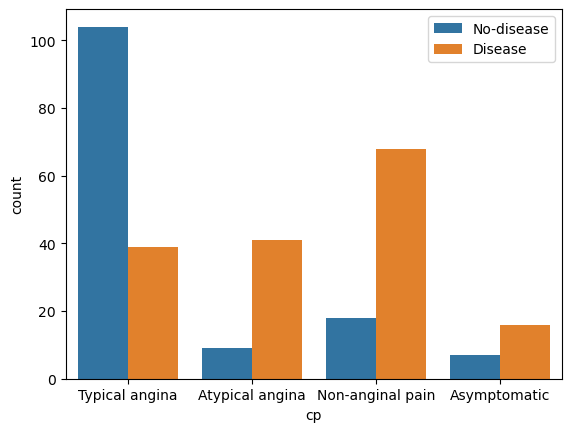

In [22]:
sns.countplot(data=data,x='cp',hue='target')
plt.xticks([0,1,2,3],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

# finding the patients with diabetes in targeted population using fasting blood sugar

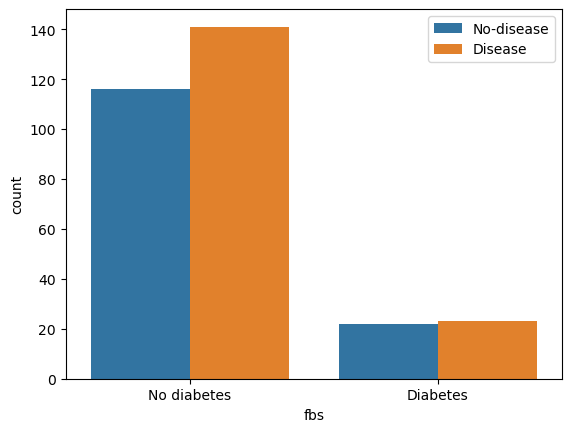

In [23]:
sns.countplot(data=data,x='fbs',hue='target')
plt.xticks([0,1],['No diabetes','Diabetes'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

#ploting resting blood pressure on admission to hospital

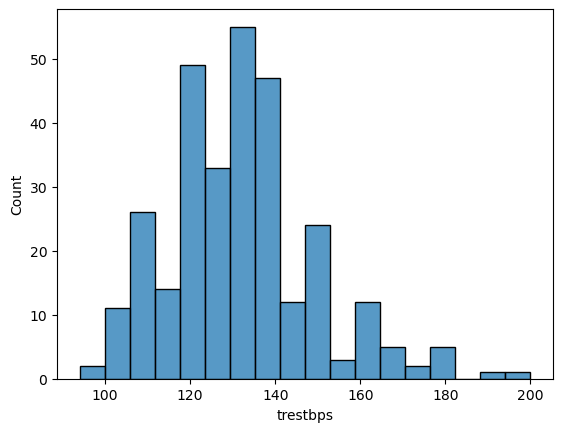

In [24]:
sns.histplot(data['trestbps'])
plt.show()

#finding the resting blood pressure distribution across male and female 

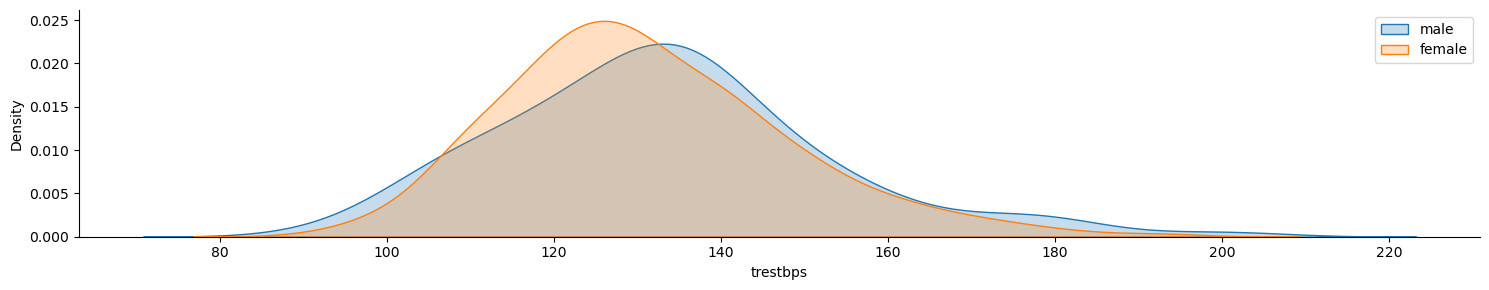

In [25]:
g=sns.FacetGrid(data,hue='sex',aspect=5)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['male','female'])
plt.show()

#ploting the serum cholestrol distribution range in mg/ml

In [53]:
def categorize_chol(chol):
    if chol<200:
        return 'normal chol'
    elif chol>200 and chol<240:
        return 'border line chol'
    else:
        return 'high chol'
    
data=data_copy
data['chol_category'] = data_copy['chol'].apply(categorize_chol)
print(data['chol_category'].value_counts())



high chol           156
border line chol     97
normal chol          49
Name: chol_category, dtype: int64


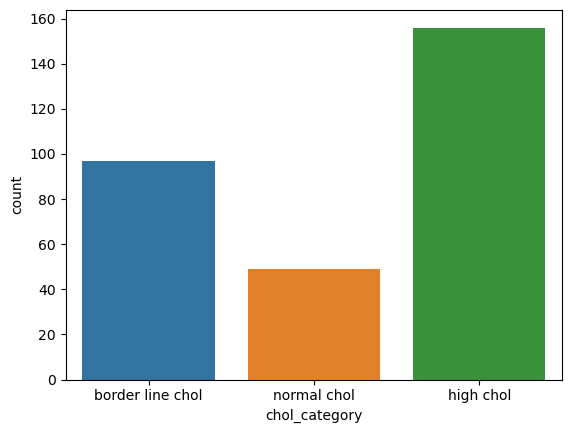

In [56]:
sns.countplot(x='chol_category', data=data)
plt.show()

#age wise cholesterol distribution in agiven population 

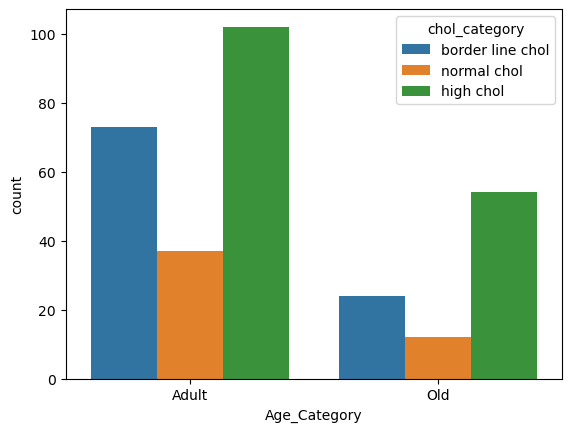

In [82]:
sns.countplot(data=data_copy,x='Age_Category',hue='chol_category')
plt.show()

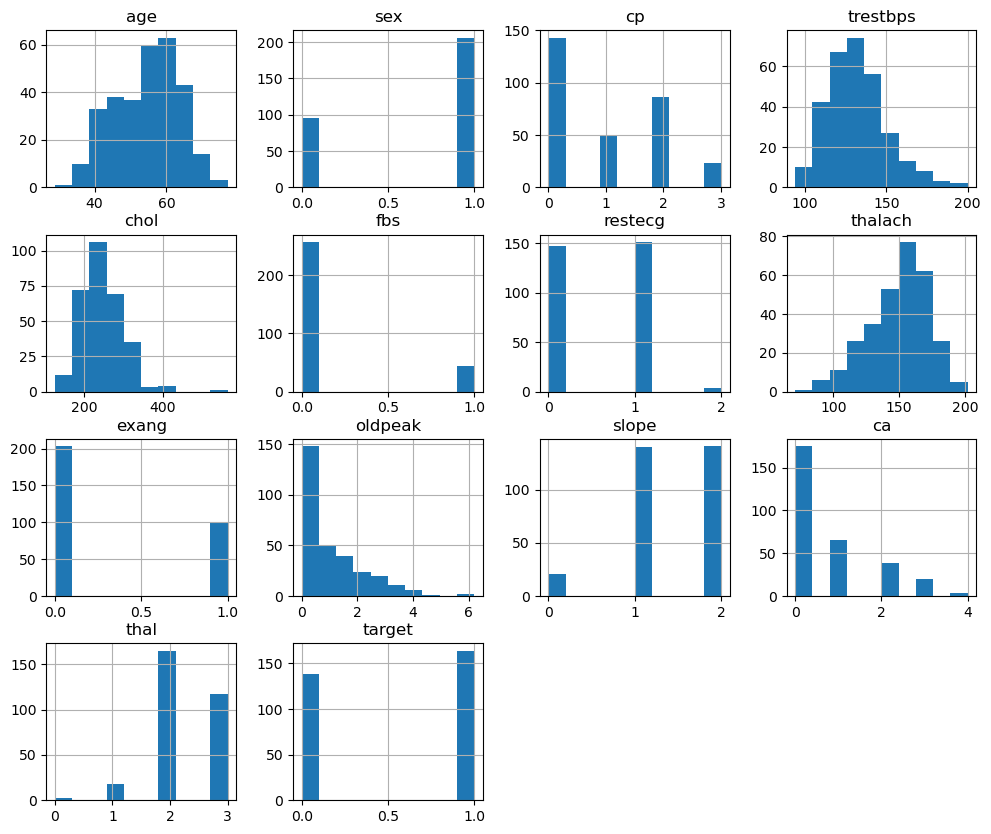

In [27]:
data.hist(figsize=(12,10))
plt.show()